### Exploring the Calories data set

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('D:\Python-Projects\Stuff_that_is_being_used\calories.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


 since we really need the features that will matter in our prediction algorithm so we will drop the user_ID coloum 

In [5]:
df.drop("User_ID", axis='columns', inplace=True)

In [6]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Now lets do the EDA 

We need to answer some key questions to understand the data:

- Are there missing values?
- What are the distributions of features (like age and weight)?
- Do features like heart rate and duration relate to calories burned?
- Are there outliers or unusual patterns?


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [8]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
# take gender categorial coloum then encode it so that the ML can understand it

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Gender']]).toarray()
encoded

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(15000, 2))

In [10]:
encoder_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
encoder_df

,Gender_female,Gender_male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
14995,1.0,0.0
14996,1.0,0.0
14997,1.0,0.0
14998,0.0,1.0


In [11]:
df = pd.concat([df, encoder_df], axis=1)

In [12]:
df.drop('Gender', axis=1, inplace=True)

In [13]:
df

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0.0,1.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1.0,0.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0.0,1.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1.0,0.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0,1.0,0.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0,1.0,0.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0,1.0,0.0
14998,78,193.0,97.0,2.0,84.0,38.3,11.0,0.0,1.0


In [14]:
df.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'Gender_female', 'Gender_male'],
      dtype='object')

In [15]:
X = df[['Age','Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender_female', 'Gender_male' ]]

Y = df[['Calories']]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [17]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
lm.fit(X_train, Y_train)

LinearRegression()

In [20]:
lm.coef_

array([[  8.49398607,  -2.31465351,   4.02421809,  55.49617907,
         19.13265592, -13.229112  ,   0.25083929,  -0.25083929]])

In [21]:
lm.intercept_

array([89.76142857])

In [22]:
predictions = lm.predict(X_test)
predictions

array([[ 43.50461535],
       [ 71.59375698],
       [ 40.87407953],
       ...,
       [124.80764945],
       [ 19.19028206],
       [ 63.55832492]], shape=(4500, 1))

Text(0, 0.5, 'Predicted Y')

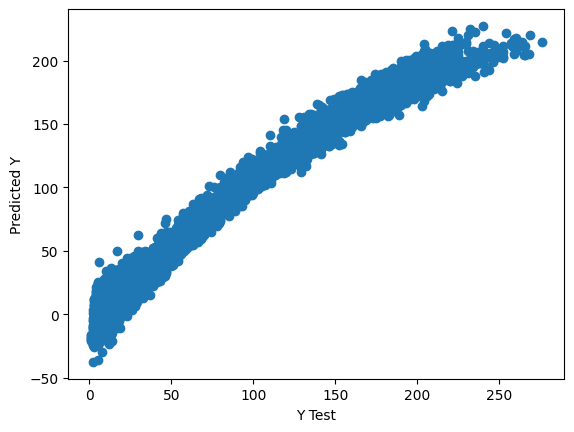

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, predictions, )
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [24]:
from sklearn import metrics

In [25]:
# MAE 
metrics.mean_absolute_error(Y_test, predictions)

8.247386589922852

In [ ]:
# MSE

metrics.mean_squared_error(Y_test, predictions)


126.66593315102313

In [27]:
#RMSE 

np.sqrt(metrics.mean_squared_error(Y_test, predictions))

np.float64(11.254596090087956)

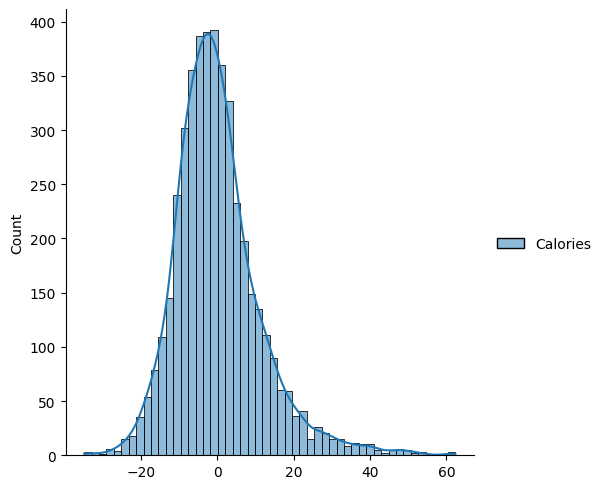

In [28]:
sns.displot((Y_test - predictions), bins=50, kde=True)